# Customer Personality Analysis

Import the needed library:

In [160]:
import pandas as pd # For manipulate and analyze data I/O dataframe
import numpy as np # For numeric and computation operation
import matplotlib.pyplot as plt # For visualization of graph and plot
import seaborn as sns # Built on plt, provide more satisfying visualization
import warnings # Handle the showed warning
warnings.filterwarnings("ignore")

## Import the Dataset

Install Kaggel:

In [161]:
#! pip install kaggle

- Put your credential `kaggle.json` from Kaggle API Token in your `C:\Users\<username>\.kaggle\`
- Change the `api.dataset_download_files('<username>/<dataset-name>', unzip=True)` with dataset that you wanted from kaggle.

In [162]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()
api.dataset_download_files('imakash3011/customer-personality-analysis', unzip=True)

In [163]:
df = pd.read_csv("marketing_campaign.csv", sep='\t')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [165]:
df = df.dropna()
print('Number of data after remove the rows with missing values: ', len(df))

Number of data after remove the rows with missing values:  2216


In [166]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
dates = []
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)

print("The newest customer's enrolment date in the records: ", max(dates))
print("The oldest customer's enrolment date in the records: ", min(dates))

The newest customer's enrolment date in the records:  2014-06-29
The oldest customer's enrolment date in the records:  2012-07-30


In [167]:
days = []
d_max = max(dates)
for i in dates:
    delta = d_max - i
    days.append(delta)
    
df['Long_Membership'] = days
df['Long_Membership'] = pd.to_numeric(df['Long_Membership'], errors="coerce")
df[['Dt_Customer', 'Long_Membership']]

,Dt_Customer,Long_Membership
0,2012-09-04,57283200000000000
1,2014-03-08,9763200000000000
2,2013-08-21,26956800000000000
3,2014-02-10,12009600000000000
4,2014-01-19,13910400000000000
...,...,...
2235,2013-06-13,32918400000000000
2236,2014-06-10,1641600000000000
2237,2014-01-25,13392000000000000
2238,2014-01-24,13478400000000000


In [168]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [169]:
df['Age'] = 2014 - df['Year_Birth']
df['Spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Status'] = df['Marital_Status'].replace({'Married':'Relationship', 'Together':'Relationship', 'Absurd':'Single', 'Widow':'Single', 'YOLO':'Single', 'Divorced':'Single', 'Single':'Single', 'Alone':'Single'})
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Long_Membership,Age,Spend,Status
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,57283200000000000,57,1617,Single
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,9763200000000000,60,27,Single
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,26956800000000000,49,776,Relationship
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,12009600000000000,30,53,Relationship
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,13910400000000000,33,422,Relationship


In [170]:
df = df[df['Income'] < 600000]
df = df[df['Age'] < 80]
drop_attributes = ['ID', 'Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
df.drop(columns=drop_attributes, inplace=True)
df.head()

,Education,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Long_Membership,Age,Spend,Status
0,Graduation,58138.0,635,88,546,172,88,88,3,8,10,4,7,57283200000000000,57,1617,Single
1,Graduation,46344.0,11,1,6,2,1,6,2,1,1,2,5,9763200000000000,60,27,Single
2,Graduation,71613.0,426,49,127,111,21,42,1,8,2,10,4,26956800000000000,49,776,Relationship
3,Graduation,26646.0,11,4,20,10,3,5,2,2,0,4,6,12009600000000000,30,53,Relationship
4,PhD,58293.0,173,43,118,46,27,15,5,5,3,6,5,13910400000000000,33,422,Relationship


## Data Visualization

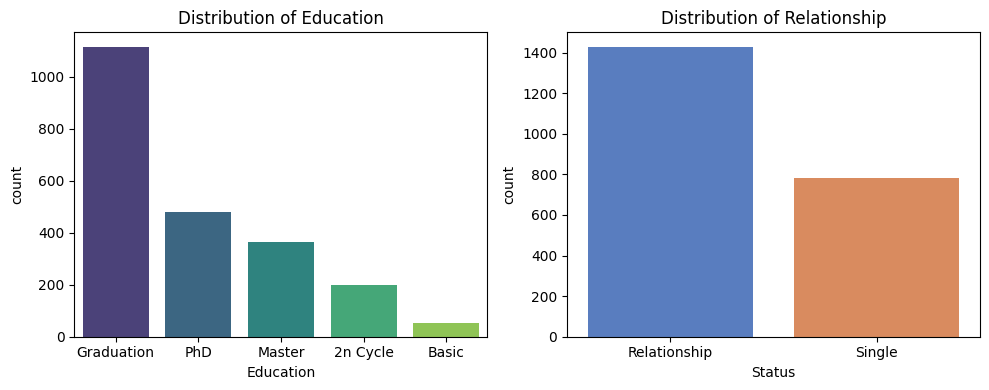

In [171]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Education', data=df, order=df['Education'].value_counts().index, palette='viridis')
plt.title('Distribution of Education')

plt.subplot(1, 2, 2)
sns.countplot(x='Status', data=df, order=df['Status'].value_counts().index, palette='muted')
plt.title('Distribution of Relationship')

plt.tight_layout()
plt.show()

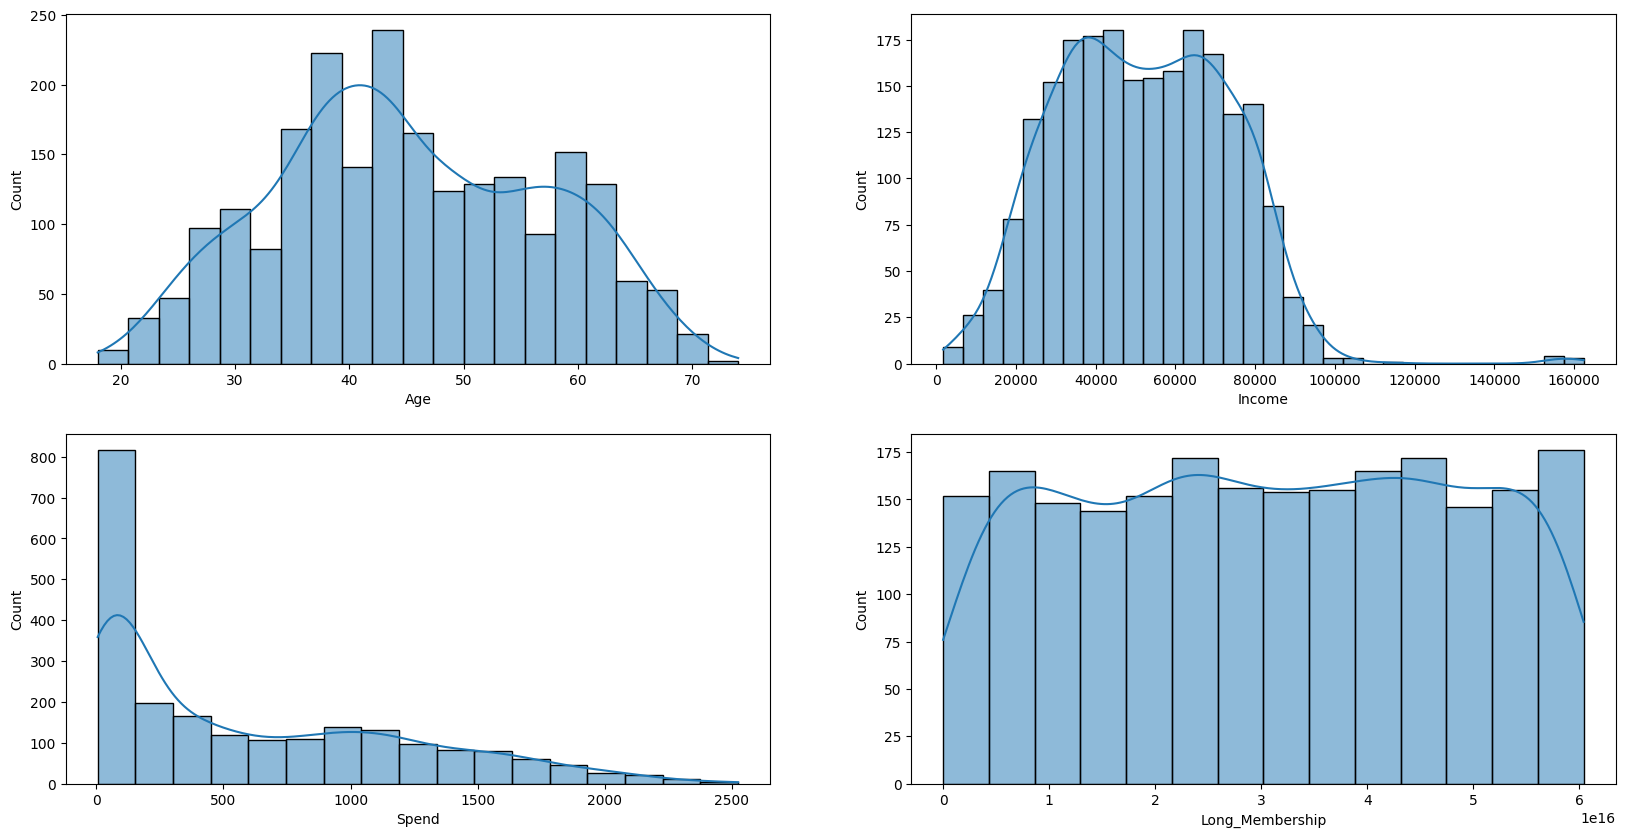

In [172]:
plt.figure(figsize=(20, 10))
n = 0
for cols in ['Age', 'Income', 'Spend', 'Long_Membership']:
    n += 1
    plt.subplot(2, 2, n)
    sns.histplot(df[cols], kde=True)
    plt.ylabel('Count')

plt.show()

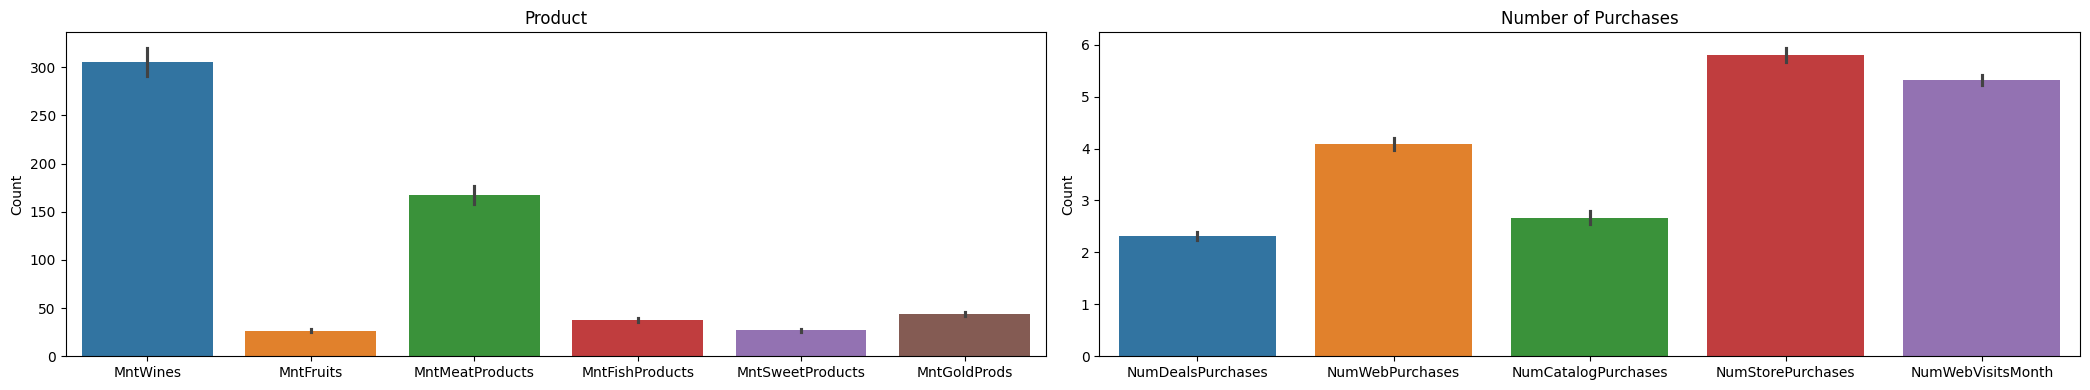

In [173]:
attributes1 = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
attributes2 = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(21, 4))

plt.subplot(1, 2, 1)
sns.barplot(df[attributes1])
plt.ylabel('Count')
plt.title('Product')

plt.subplot(1, 2, 2)
sns.barplot(df[attributes2])
plt.ylabel('Count')
plt.title('Number of Purchases')

plt.tight_layout()
plt.show()

In [174]:
map_status = {'Single': 0, 'Relationship': 1}
df.Status.replace(map_status, inplace=True)

map_education = {'Basic': 0, '2n Cycle': 1, 'Graduation': 3, 'Master': 4, 'PhD': 5}
df.Education.replace(map_education, inplace=True)
df.head()

,Education,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Long_Membership,Age,Spend,Status
0,3,58138.0,635,88,546,172,88,88,3,8,10,4,7,57283200000000000,57,1617,0
1,3,46344.0,11,1,6,2,1,6,2,1,1,2,5,9763200000000000,60,27,0
2,3,71613.0,426,49,127,111,21,42,1,8,2,10,4,26956800000000000,49,776,1
3,3,26646.0,11,4,20,10,3,5,2,2,0,4,6,12009600000000000,30,53,1
4,5,58293.0,173,43,118,46,27,15,5,5,3,6,5,13910400000000000,33,422,1


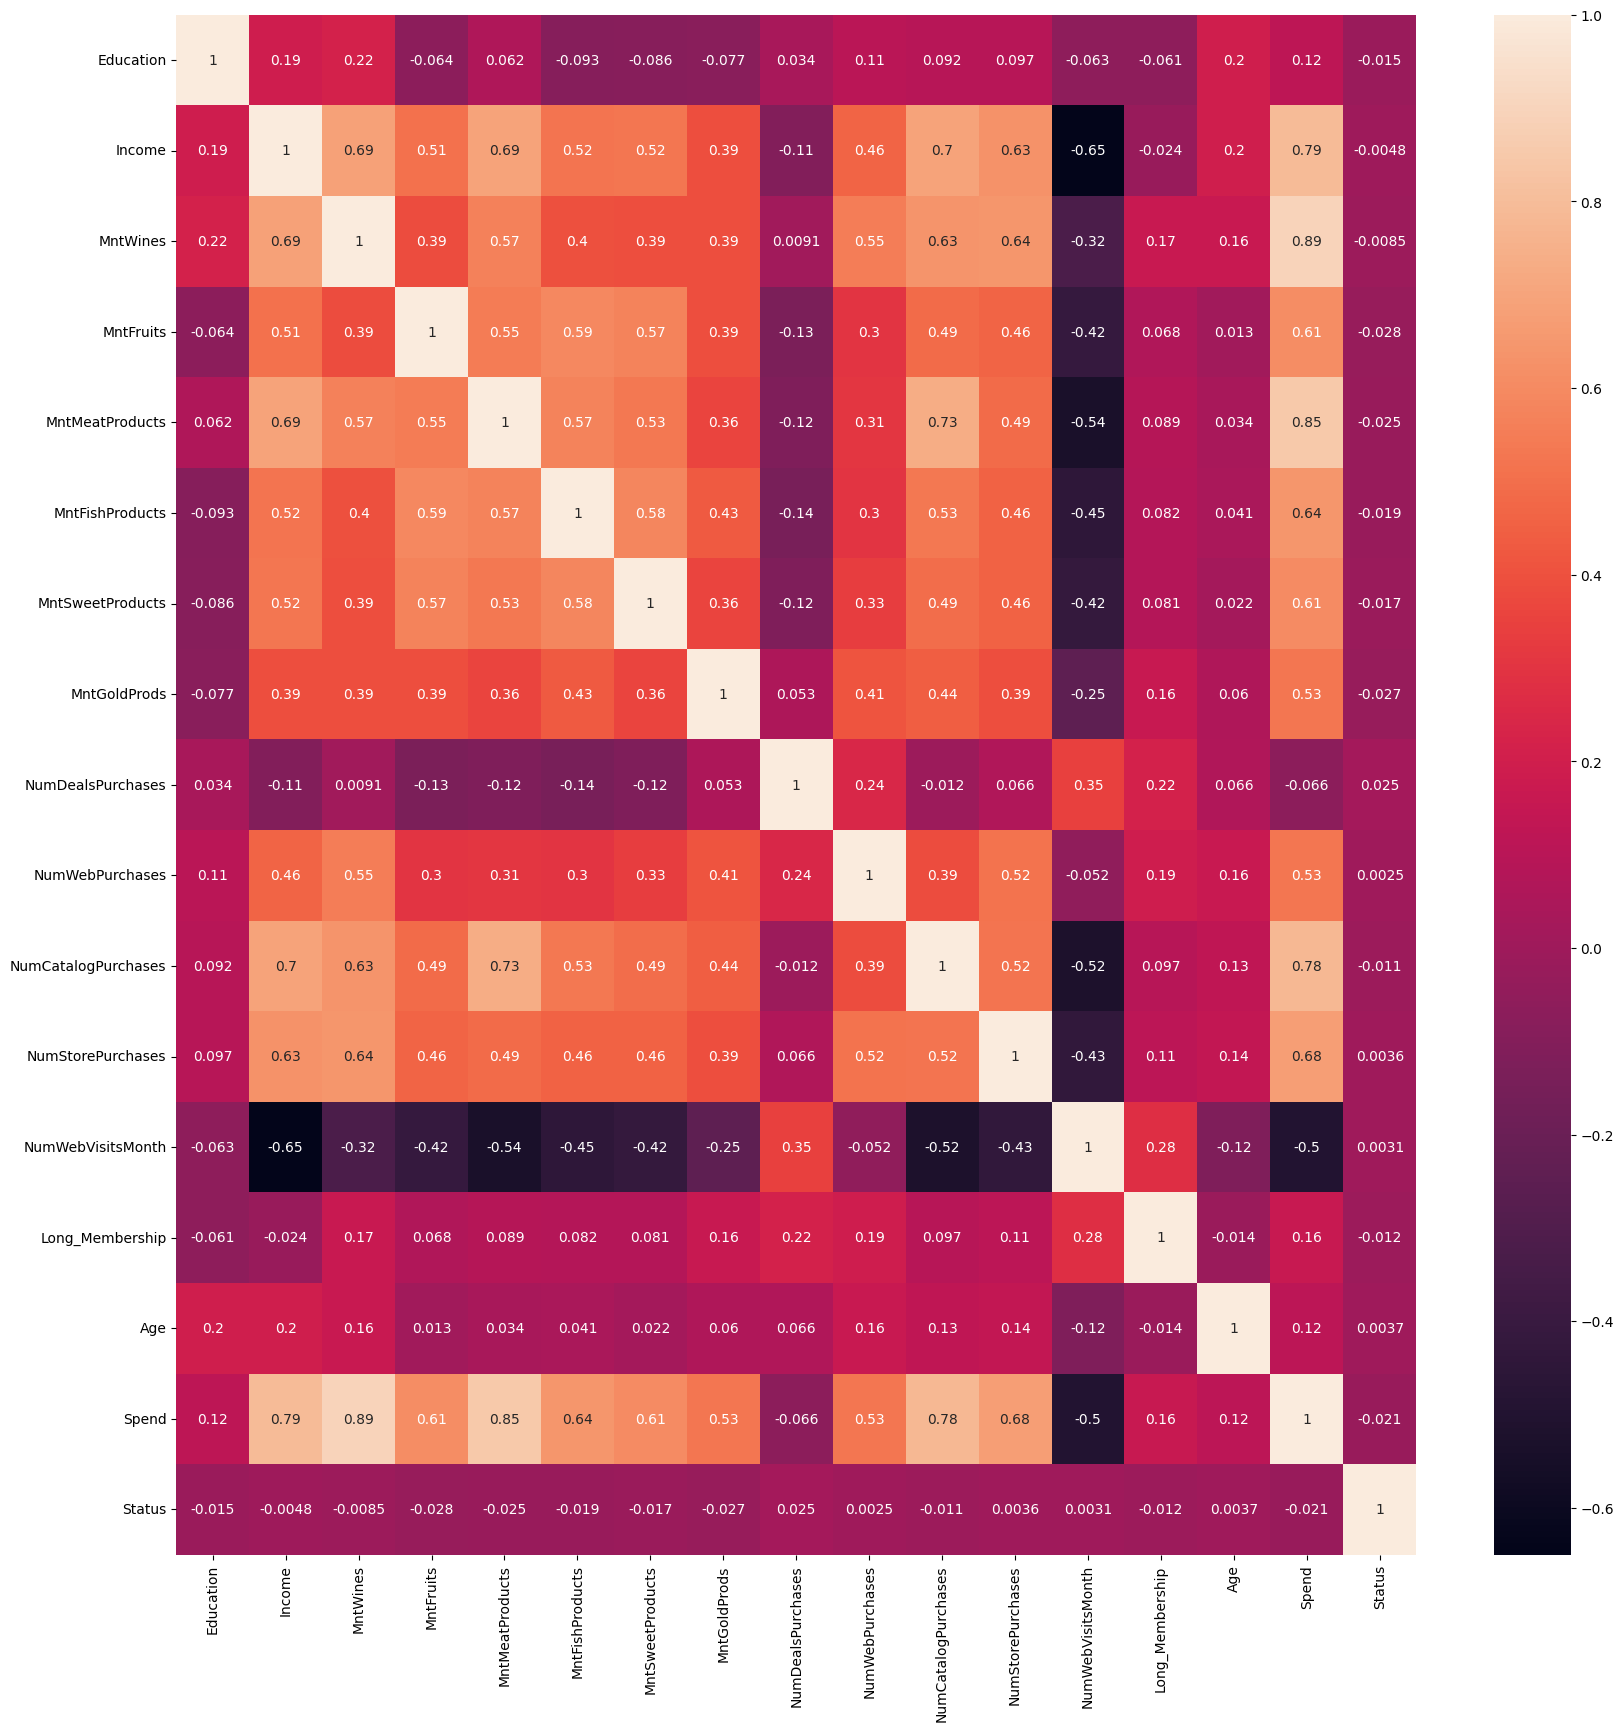

In [175]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

plt.show()

## Modelling ML

In [176]:
df.iloc[:, [1, 15]].values

array([[5.8138e+04, 1.6170e+03],
       [4.6344e+04, 2.7000e+01],
       [7.1613e+04, 7.7600e+02],
       ...,
       [5.6981e+04, 1.2410e+03],
       [6.9245e+04, 8.4300e+02],
       [5.2869e+04, 1.7200e+02]])

In [177]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = df.iloc[:, [1, 15]].values
wcss = []
scores = []
for i in range(2, 8):
    km = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(x, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg) + '\n')

wcss score for n_cluster = 2 is [319214557788.9747]
silhoutte score for n_clusters = 2 is 0.6062011972730365

wcss score for n_cluster = 3 is [319214557788.9747, 183126451616.33258]
silhoutte score for n_clusters = 3 is 0.541260768401749

wcss score for n_cluster = 4 is [319214557788.9747, 183126451616.33258, 122364598024.23383]
silhoutte score for n_clusters = 4 is 0.5300252408592903

wcss score for n_cluster = 5 is [319214557788.9747, 183126451616.33258, 122364598024.23383, 81084999134.43004]
silhoutte score for n_clusters = 5 is 0.537894318758654

wcss score for n_cluster = 6 is [319214557788.9747, 183126451616.33258, 122364598024.23383, 81084999134.43004, 53617346991.01988]
silhoutte score for n_clusters = 6 is 0.5385464852736559

wcss score for n_cluster = 7 is [319214557788.9747, 183126451616.33258, 122364598024.23383, 81084999134.43004, 53617346991.01988, 40128318687.54912]
silhoutte score for n_clusters = 7 is 0.5214595024394624



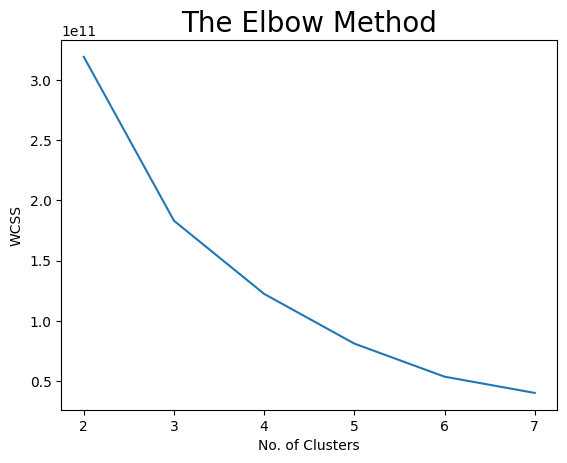

In [178]:
plt.plot(range(2, 8), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

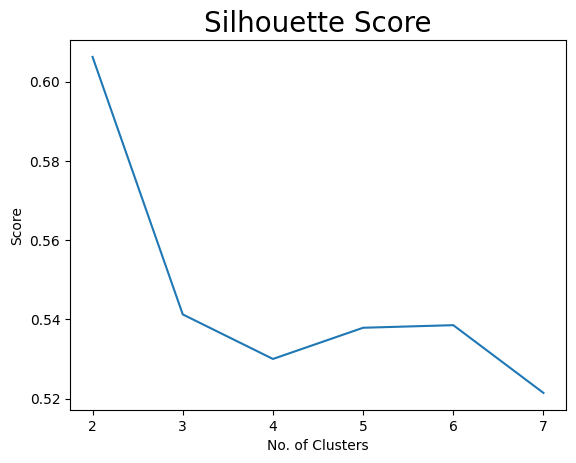

In [179]:
plt.plot(range(2, 8), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

In [180]:
kmeansmodel = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans= kmeansmodel.fit_predict(x)

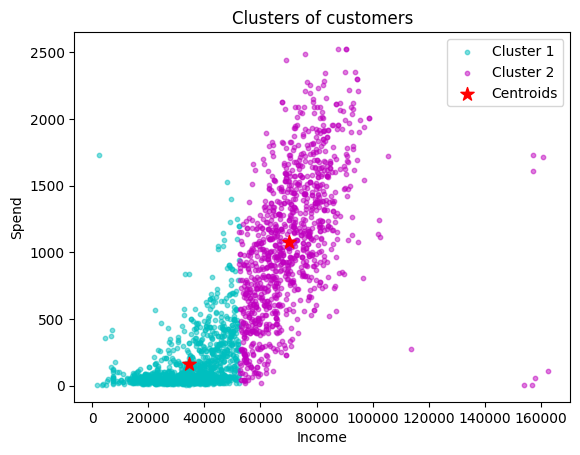

In [181]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, c = 'c', label = 'Cluster 1', alpha=0.5)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, c = 'm', label = 'Cluster 2', alpha=0.5)
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 100, c = 'red', marker='*', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.legend()
plt.show()

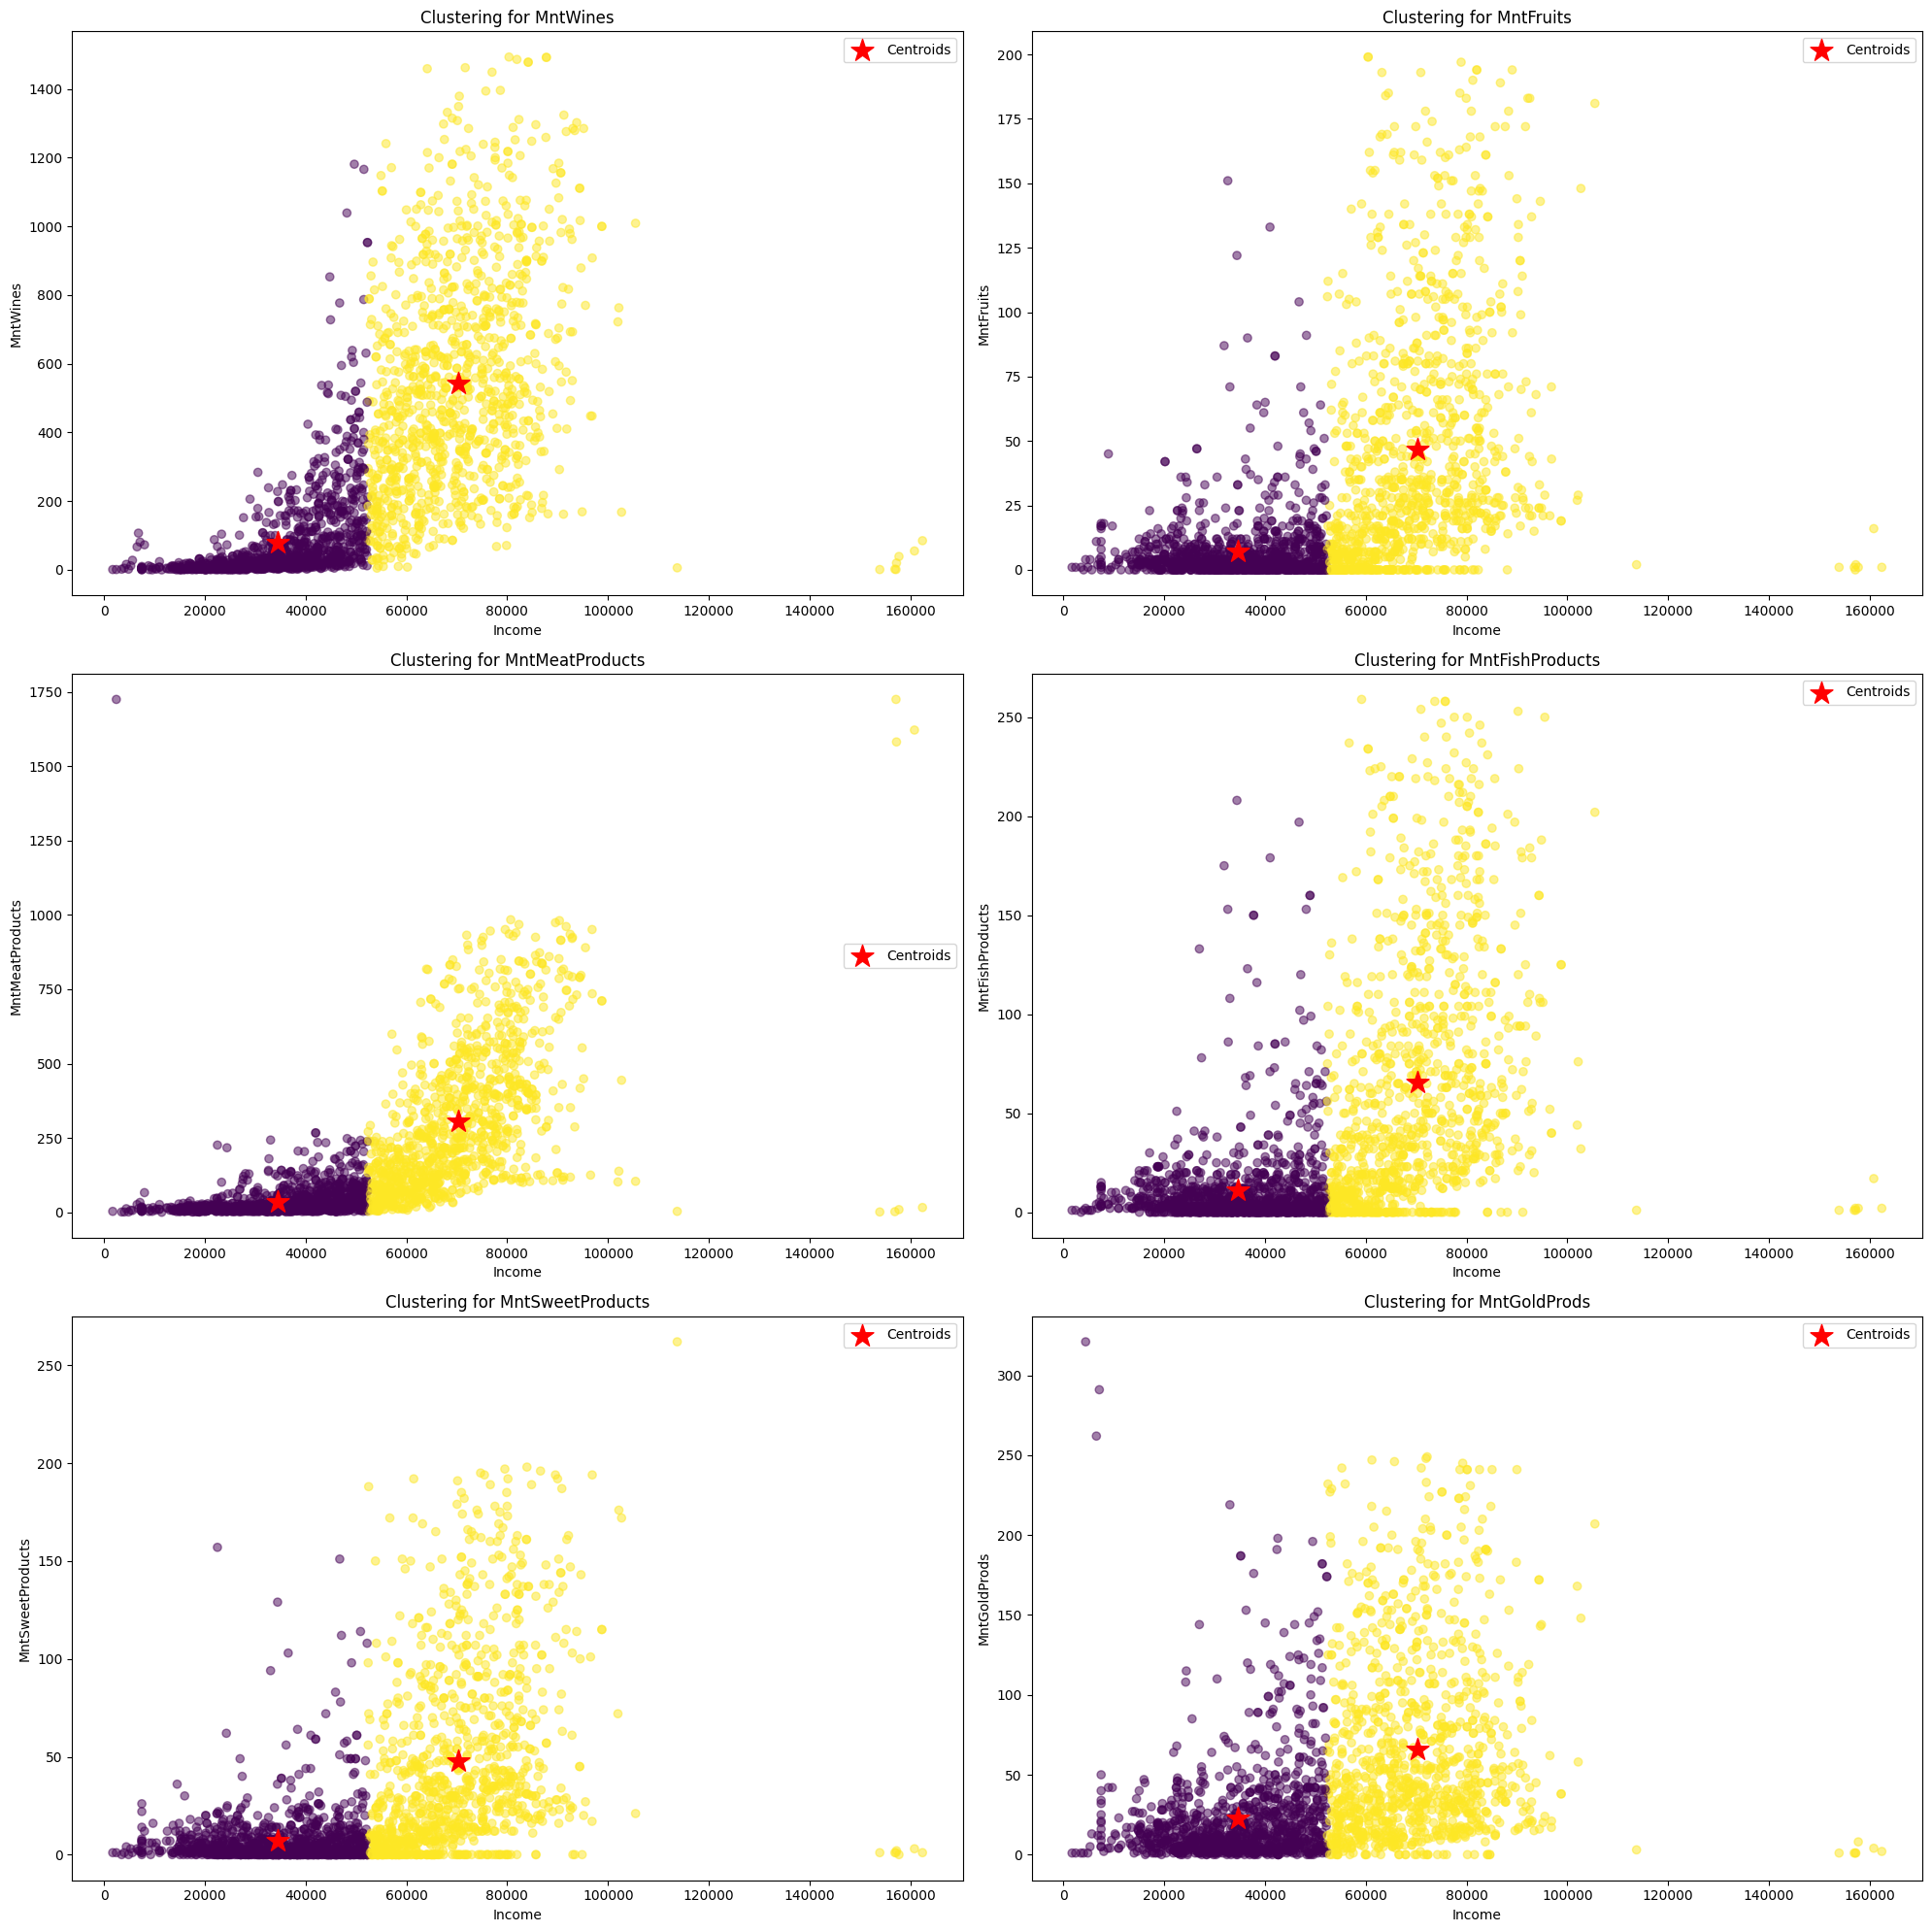

In [182]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(20, 20))

num_rows = 3
num_cols = 2

total_subplots = num_rows * num_cols

for idx, product in enumerate(product_columns, start=1):
    data = df[['Income', product]]
    n_clusters = 2
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    
    df[f'{product}_cluster'] = kmeans.labels_
    
    plt.subplot(num_rows, num_cols, idx)
    
    plt.scatter(data['Income'], data[product], c=kmeans.labels_, cmap='viridis', alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
    plt.title(f'Clustering for {product}')
    plt.xlabel('Income')
    plt.ylabel(product)
    plt.legend()

plt.tight_layout()
plt.show()


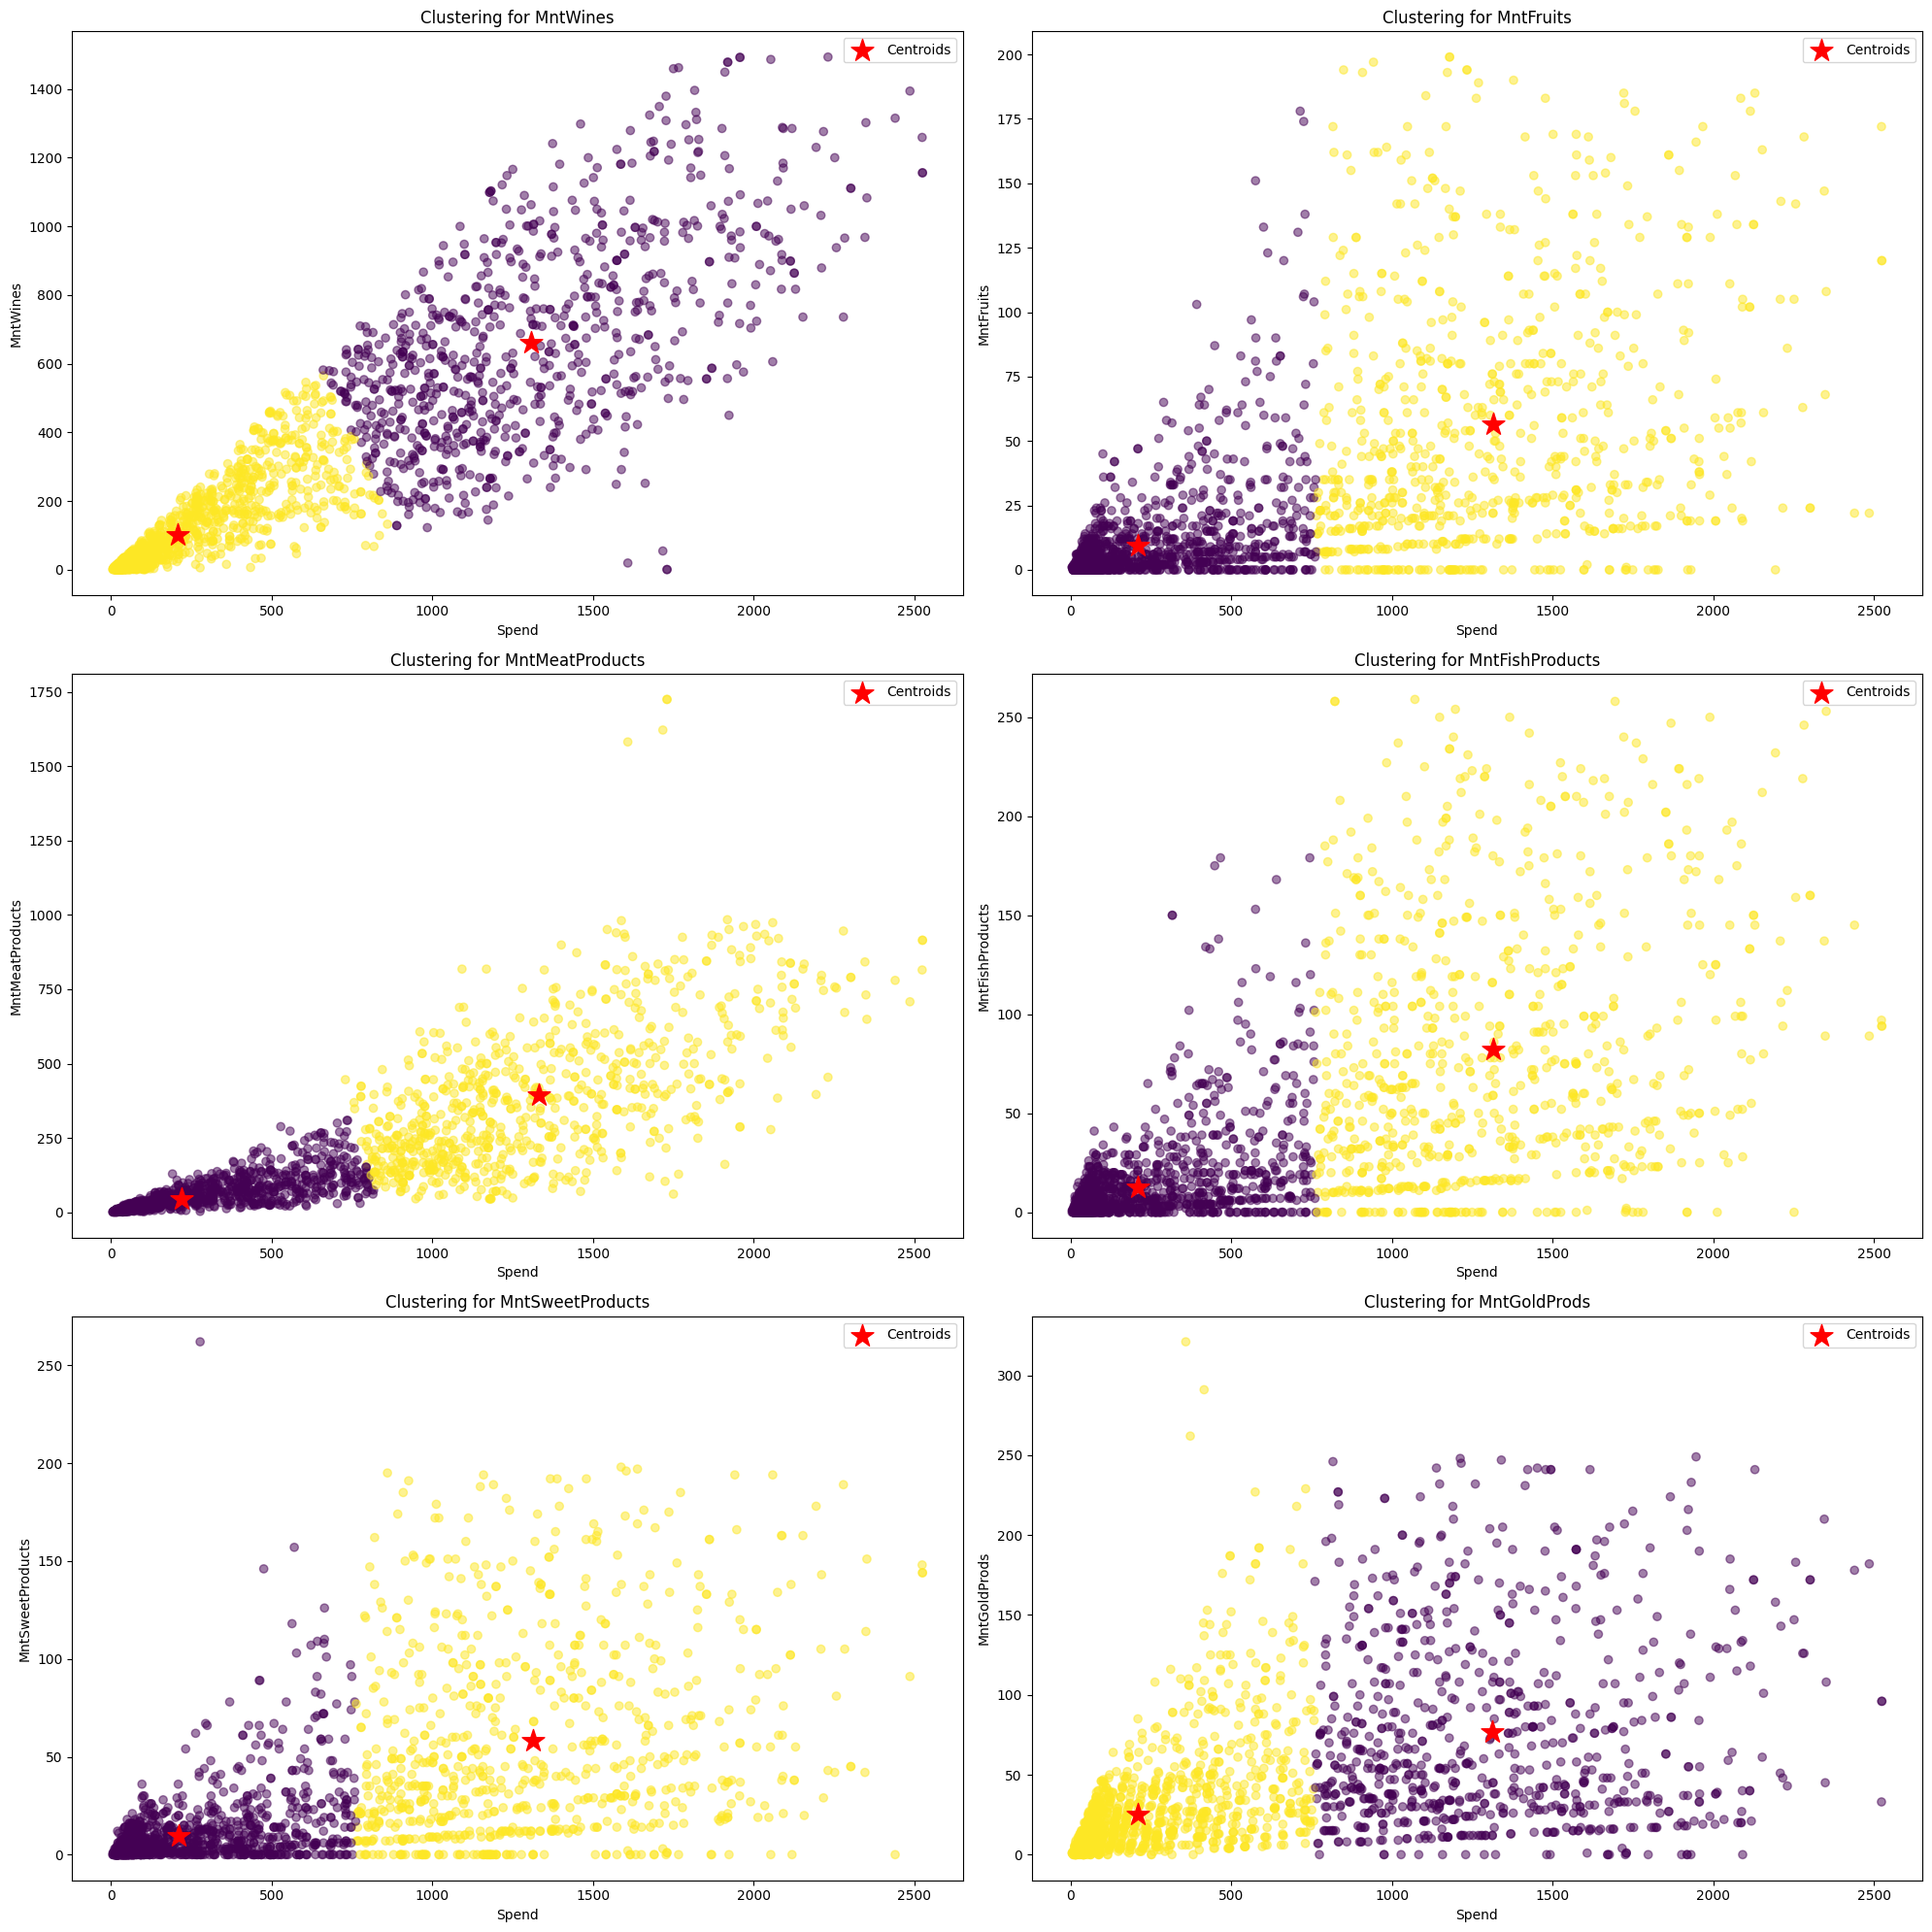

In [183]:
produk_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(20, 20))

num_rows = 3
num_cols = 2

total_subplots = num_rows * num_cols

for idx, produk in enumerate(produk_columns, start=1):
    data = df[['Spend', produk]]
    n_clusters = 2
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    
    df[f'{produk}_cluster'] = kmeans.labels_
    
    plt.subplot(num_rows, num_cols, idx)
    
    plt.scatter(data['Spend'], data[produk], c=kmeans.labels_, cmap='viridis', alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
    plt.title(f'Clustering for {produk}')
    plt.xlabel('Spend')
    plt.ylabel(produk)
    plt.legend()

plt.tight_layout()
plt.show()


## Hasil Analisis

- Semakin tinggi `Income` Customer maka semakin tinggi pula `Spend`-nya.
- Semakin tinggi `Income` maka semakin tinggi juga pembelian setiap produknya. 